# Import and Data Processing

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


In [ ]:
df = pd.read_excel("/content/AllPred.xlsx")
df.head()

,comment,label,pred5,pred2
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual,2,0
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully,0,1
2,"অরে বাবা, এই টা কোন পাগল????",not bully,4,0
3,ক্যাপ্টেন অফ বাংলাদেশ,not bully,0,1
4,পটকা মাছ,troll,0,1


In [ ]:
X = df[['pred2','pred5']]
Y = df[['label']]

In [ ]:
for i in range(len(Y)):
  if Y['label'][i]=='not bully':
    Y['label'][i]=0
  elif  Y['label'][i]=='troll':
    Y['label'][i]=4
  elif  Y['label'][i]=='sexual':
    Y['label'][i]=2
  elif  Y['label'][i]=='threat':
    Y['label'][i]=3
  elif  Y['label'][i]=='religious':
    Y['label'][i]=1
  

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Y

,label
0,2
1,0
2,0
3,0
4,4
...,...
43996,0
43997,0
43998,0
43999,0


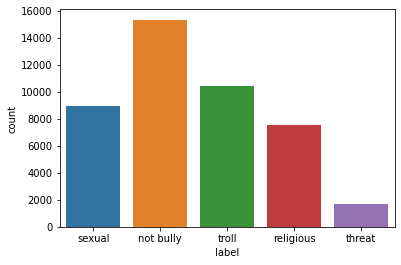

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=df)

In [ ]:
Y=Y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15, random_state=1)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()

In [ ]:
rclf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import f1_score
# dummy multi-class data, similar to yours:
y_true = y_test
y_predRF = rclf.predict(X_test) 

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true,y_predRF)

In [ ]:
cm_plot_labels = ['Not bully','Religious','Sexual','Threat','Troll']

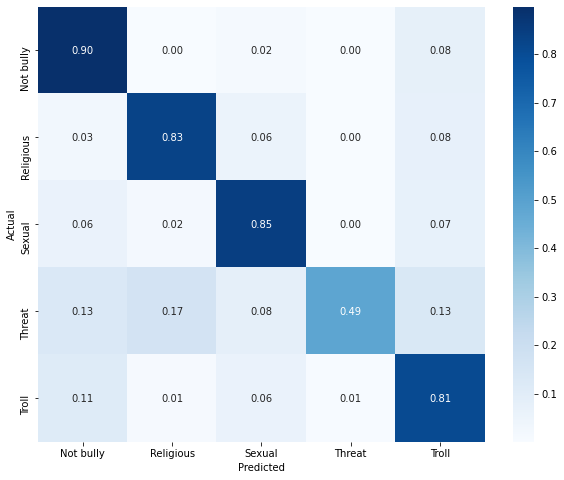

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predRF))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2366
           1       0.91      0.83      0.87      1114
           2       0.84      0.85      0.84      1341
           3       0.87      0.49      0.62       253
           4       0.75      0.81      0.78      1527

    accuracy                           0.84      6601
   macro avg       0.85      0.77      0.80      6601
weighted avg       0.84      0.84      0.84      6601



#SVM


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15, random_state=2)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predsvm = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_predsvm)

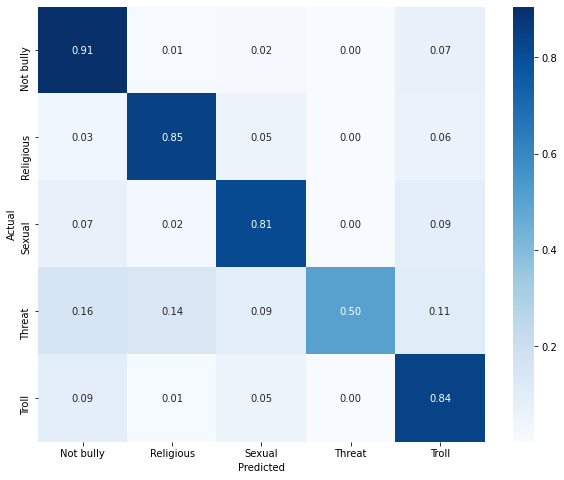

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2349
           1       0.91      0.85      0.88      1100
           2       0.84      0.81      0.83      1308
           3       0.90      0.50      0.65       274
           4       0.77      0.84      0.80      1570

    accuracy                           0.85      6601
   macro avg       0.86      0.78      0.81      6601
weighted avg       0.85      0.85      0.84      6601



# k-Nearest Neighbors Classifier

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the classifier to the training data
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8441145281018028


In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
#Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train.values.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.values.ravel())

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test.values.ravel())

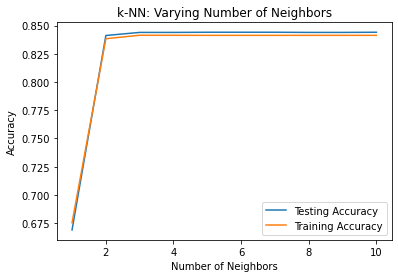

In [ ]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
y_predknn=knn.predict(X_test)
y_true = y_test

In [ ]:
cm = confusion_matrix(y_true,y_predknn)

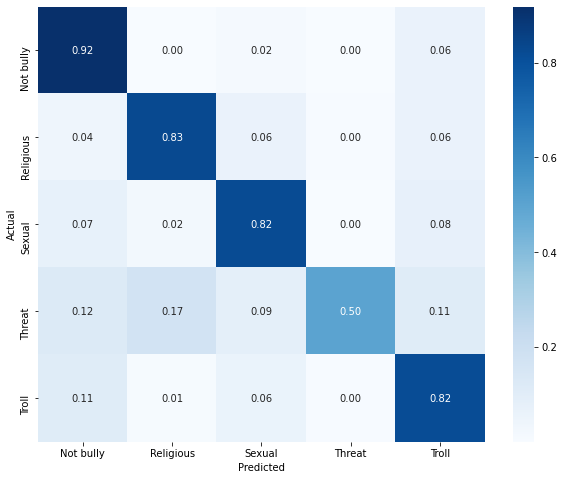

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
f1_score(y_true, y_predknn, average='macro') 

0.8057543646696054

In [ ]:
f1_score(y_true, y_predknn, average='micro') 

0.8441145281018028

In [ ]:
f1_score(y_true, y_predknn, average='weighted')

0.8424540791383998

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predknn))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2259
           1       0.91      0.83      0.87      1123
           2       0.84      0.82      0.83      1405
           3       0.88      0.50      0.64       226
           4       0.79      0.82      0.80      1588

    accuracy                           0.84      6601
   macro avg       0.86      0.78      0.81      6601
weighted avg       0.85      0.84      0.84      6601



# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predNB=gnb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_predNB)

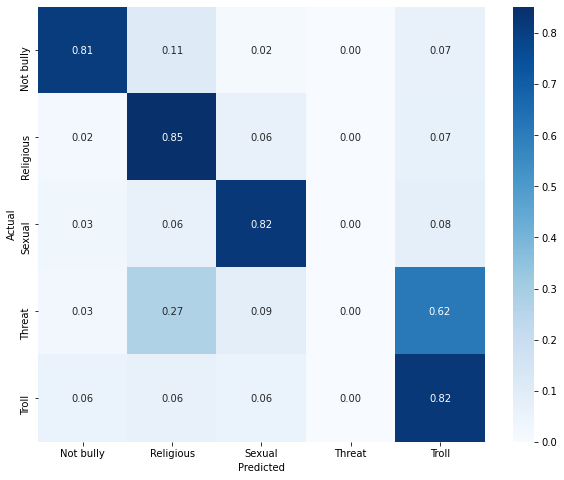

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predNB))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2259
           1       0.66      0.85      0.74      1123
           2       0.84      0.82      0.83      1405
           3       0.00      0.00      0.00       226
           4       0.73      0.82      0.78      1588

    accuracy                           0.79      6601
   macro avg       0.63      0.66      0.64      6601
weighted avg       0.78      0.79      0.78      6601



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# k-Nearest Neighbors Classifier ( 1 Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
# Create a k-NN classifier with 1 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Fit the classifier to the training data
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.6689895470383276


In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
y_predknn=knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_predknn)

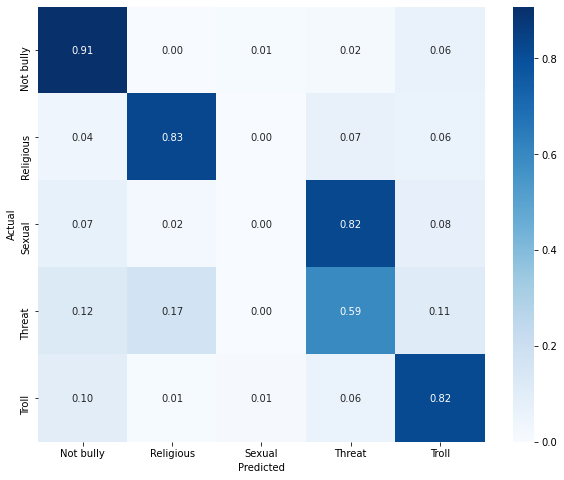

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_predknn))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2259
           1       0.91      0.83      0.87      1123
           2       0.08      0.00      0.01      1405
           3       0.09      0.59      0.15       226
           4       0.79      0.82      0.80      1588

    accuracy                           0.67      6601
   macro avg       0.55      0.63      0.54      6601
weighted avg       0.66      0.67      0.65      6601



In [ ]:
from sklearn.metrics import precision_score
print('percision Score (micro): '+str(precision_score(y_test, y_predknn, average='micro')))
print('percision Score (macro): '+str(precision_score(y_test, y_predknn, average='macro')))
print('percision Score (weighted): '+str(precision_score(y_test, y_predknn, average='weighted')))

percision Score (micro): 0.6689895470383276
percision Score (macro): 0.5460582637008141
percision Score (weighted): 0.6598182729227781
